#### Looking at relationship between sat scores and average faculty salary

Notebook contains

1. Cleasning data
2. k-means clustering

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [27]:
%matplotlib inline

In [28]:
path = r'C:\Users\kirat\Documents\Career Foundry\Personal Project'

In [29]:
df_debt = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','data_debt.csv'))

In [30]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         5428 non-null   int64  
 1   ADM_RATE       1832 non-null   float64
 2   SATMTMID       1232 non-null   float64
 3   ACTMTMID       1185 non-null   float64
 4   ACTCMMID       1259 non-null   float64
 5   GRAD_DEBT_MDN  5307 non-null   float64
 6   AVGFACSAL      3407 non-null   float64
 7   NUMBRANCH      5428 non-null   int64  
 8   LOCALE         4999 non-null   float64
 9   CURROPER       5428 non-null   int64  
 10  PFTFAC         3169 non-null   float64
 11  HIGHDEG        5428 non-null   int64  
 12  Debt Category  5307 non-null   object 
dtypes: float64(8), int64(4), object(1)
memory usage: 551.4+ KB


In [31]:
df_drop = df_debt.drop(['Debt Category'], axis=1)

In [32]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         5428 non-null   int64  
 1   ADM_RATE       1832 non-null   float64
 2   SATMTMID       1232 non-null   float64
 3   ACTMTMID       1185 non-null   float64
 4   ACTCMMID       1259 non-null   float64
 5   GRAD_DEBT_MDN  5307 non-null   float64
 6   AVGFACSAL      3407 non-null   float64
 7   NUMBRANCH      5428 non-null   int64  
 8   LOCALE         4999 non-null   float64
 9   CURROPER       5428 non-null   int64  
 10  PFTFAC         3169 non-null   float64
 11  HIGHDEG        5428 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 509.0 KB


In [33]:
df_drop.isnull().sum()

UNITID              0
ADM_RATE         3596
SATMTMID         4196
ACTMTMID         4243
ACTCMMID         4169
GRAD_DEBT_MDN     121
AVGFACSAL        2021
NUMBRANCH           0
LOCALE            429
CURROPER            0
PFTFAC           2259
HIGHDEG             0
dtype: int64

In [34]:
df_dropNA = df_drop.dropna()

In [35]:
df_dropNA.isnull().sum()

UNITID           0
ADM_RATE         0
SATMTMID         0
ACTMTMID         0
ACTCMMID         0
GRAD_DEBT_MDN    0
AVGFACSAL        0
NUMBRANCH        0
LOCALE           0
CURROPER         0
PFTFAC           0
HIGHDEG          0
dtype: int64

In [36]:
X = StandardScaler().fit_transform(df_dropNA)
X

array([[-1.40019003,  1.18872196, -1.37233835, ...,  0.09004503,
         0.20812668,  0.41887036],
       [-1.40004915,  1.30097869, -0.06284179, ...,  0.09004503,
         0.36049237,  0.41887036],
       [-1.39937607,  0.74019396,  0.08265783, ...,  0.09004503,
        -0.16398898,  0.41887036],
       ...,
       [ 4.65553702,  0.83598637, -0.64484026, ...,  0.09004503,
         1.31932325,  0.41887036],
       [ 4.69330802, -1.57429033, -1.08133912, ...,  0.09004503,
        -1.31295507,  0.41887036],
       [ 4.70689494, -1.74392272, -1.00858931, ...,  0.09004503,
         1.26953615,  0.41887036]])

In [37]:
num_cl = range(1, 12)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [38]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-13427.999999999984,
 -10518.146119311568,
 -9454.575008402384,
 -8300.667006749942,
 -7288.158817079857,
 -6655.6167933704155,
 -6032.98301968844,
 -5478.93713516207,
 -5130.006800458748,
 -4887.051714773668,
 -4653.877074968302]

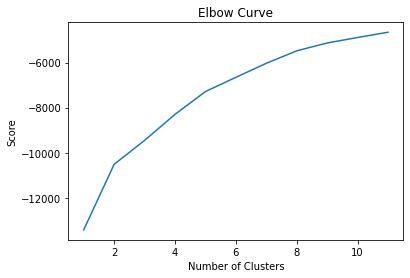

In [39]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The Elbow Curve doesn't show an optimal number of clusters, choosing 4 clusters will prove to be optimal.

In [40]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [41]:
kmeans.fit(X)

C:\Users\kirat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [42]:
df_dropNA['clusters'] = kmeans.fit_predict(X)

C:\Users\kirat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-42-c07edfcbbcef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropNA['clusters'] = kmeans.fit_predict(X)


In [43]:
df_dropNA['clusters'].value_counts()

2    515
0    464
1    131
3      9
Name: clusters, dtype: int64

In [44]:
df_dropNA.head()

,UNITID,ADM_RATE,SATMTMID,ACTMTMID,ACTCMMID,GRAD_DEBT_MDN,AVGFACSAL,NUMBRANCH,LOCALE,CURROPER,PFTFAC,HIGHDEG,clusters
0,100654,0.8986,465.0,17.0,18.0,33375.0,7101.0,1,12.0,1,0.7411,4,0
1,100663,0.9211,555.0,23.0,25.0,22500.0,10717.0,1,12.0,1,0.7766,4,2
3,100706,0.8087,565.0,27.0,28.0,21607.0,9442.0,1,12.0,1,0.6544,4,2
4,100724,0.9774,465.0,17.0,18.0,32000.0,7754.0,1,12.0,1,0.5826,4,0
5,100751,0.5906,580.0,25.0,27.0,23250.0,10225.0,1,12.0,1,0.7454,4,2


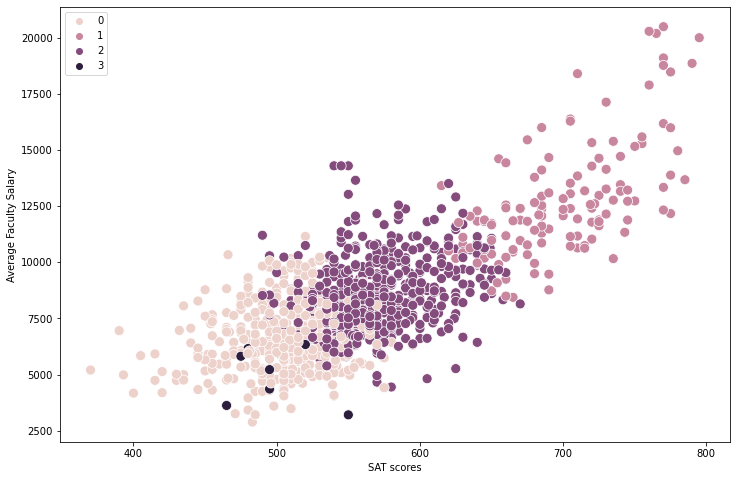

In [45]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_dropNA['SATMTMID'], y=df_dropNA['AVGFACSAL'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('SAT scores')
plt.ylabel('Average Faculty Salary') 
plt.show()

The scatter plot shows 3 clusters identifies by color

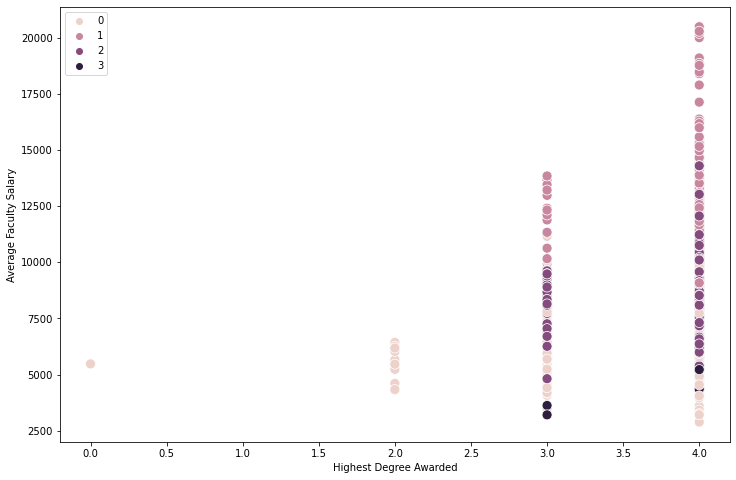

In [46]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_dropNA['HIGHDEG'], y=df_dropNA['AVGFACSAL'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Highest Degree Awarded')
plt.ylabel('Average Faculty Salary') 
plt.show()

The scatter plot shows 3 clusters identifies by color. There is a outlier in this data set that we should explore further. This plot shows a higher concentration of high salaries for the colleges that offer "PhD" as their highest awarded degree, and we see no high salaries for colleges that award "associate degrees" only.

In [47]:
df_dropNA.loc[df_dropNA['clusters'] == 2, 'cluster'] = 'mid range salary'
df_dropNA.loc[df_dropNA['clusters'] == 1, 'cluster'] = 'high range salary'
df_dropNA.loc[df_dropNA['clusters'] == 0, 'cluster'] = 'lower range salary'
df_dropNA.loc[df_dropNA['clusters'] == 3, 'cluster'] = 'outside cluster'

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
df_dropNA.groupby('cluster').agg({'HIGHDEG':['mean', 'median'], 
                         'SATMTMID':['mean', 'median'], 
                         'AVGFACSAL':['mean', 'median']})

HIGHDEG           SATMTMID            AVGFACSAL         
                        mean median        mean median          mean   median
cluster                                                                      
high range salary   3.854962      4  698.877863  700.0  12759.374046  12284.0
lower range salary  3.737069      4  507.280172  510.0   6627.405172   6528.0
mid range salary    3.899029      4  571.708738  570.0   8575.557282   8428.0
outside cluster     3.666667      4  501.888889  495.0   5210.777778   5812.0

Discriptive Statistics shows that 
"pink" is the cluster with the highest salaries

In [49]:
df_dropNA.to_csv(os.path.join(path, '02 Data','Prepared Data','clusters.csv'))